In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 60)

# Plotting settings
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

## Step 1: Cleaning and Preprocessing Datasets

First, I will load the datasets and inspect the data to get a sense of it structure and content. This includes checking for data types and missing or null values.

In [2]:
# Get current working directory
cwd = os.getcwd()

# Load data sets
builds = pd.read_csv(os.path.join(cwd, f"alloyed_challenge_data/builds.csv"), parse_dates=["start_time", "end_time"])
machine_logs = pd.read_csv(os.path.join(cwd, f"alloyed_challenge_data/machine_logs.csv"), parse_dates=["timestamp"])
parts = pd.read_csv(os.path.join(cwd, f"alloyed_challenge_data/parts.csv"))

In [3]:
# Inspect dataframes
print("=== builds ===")
display(builds.head())
print("\n=== machine_logs ===")
display(machine_logs.head())
print("\n=== parts ===")
display(parts.head())

=== builds ===


build_id                 start_time  \
0   B00342 2025-02-09 18:31:48.976864   
1   B00343 2025-02-09 14:18:26.028030   
2   B00344 2025-02-09 21:59:58.539147   
3   B00345 2025-02-10 16:27:15.394350   
4   B00346 2025-02-11 22:25:15.079998   

                    end_time machine  avg_laser_power_w  \
0 2025-02-10 14:00:52.334761    M000             282.95   
1 2025-02-11 18:35:55.009248    M001             304.03   
2 2025-02-10 19:10:05.603395    M002             297.86   
3 2025-02-11 12:57:11.067449    M000             425.20   
4 2025-02-12 17:03:27.450787    M001             149.04   

   avg_scan_speed_mm_s  hatch_spacing_mm  \
0              1086.15               0.2   
1               372.53               0.1   
2              1218.97               0.1   
3              1066.85               0.1   
4               848.83               NaN   

   layer_thickness_um      powder_batch  
0                  40  POW_AlSi10Mg_000  
1                  40  POW_AlSi10Mg_001  
2                  60  POW_AlSi10Mg_002  
3                  40  POW_AlSi10Mg_000  
4                  50  POW_AlSi10Mg_001


=== machine_logs ===


machine_id                  timestamp  oxygen_ppm  \
0       M001 2025-02-09 14:18:26.028030       142.0   
1       M001 2025-02-09 14:33:26.028030       150.0   
2       M001 2025-02-09 14:48:26.028030       154.0   
3       M001 2025-02-09 15:03:26.028030       159.0   
4       M001 2025-02-09 15:18:26.028030       153.0   

   gas_flow_rate_l_min  build_plate_temperature_deg_c  
0                 7.73                          199.2  
1                  NaN                          201.0  
2                 7.23                          201.8  
3                 7.65                          198.6  
4                 7.64                          198.8


=== parts ===


part_number build_id  volume_mm3  x_position_mm  \
0            0   B00342   6021421.0         -76.03   
1            1   B00342   3447488.0         171.87   
2            2   B00342   2856402.0        -162.56   
3            3   B00342   2280795.0        -142.24   
4            4   B00342   7023322.0         133.03   

   y_position_mm  z_position_mm     geometry  \
0         -24.82         262.09      lattice   
1        -123.01          10.89      lattice   
2         177.87          79.51  tensile_bar   
3         -69.81          23.98  tensile_bar   
4         144.22         232.74      lattice   

   relative_density  
0             91.69  
1             97.62  
2             96.74  
3             98.00  
4             96.76

In [4]:
# Check structure of each dataframe
print("=== builds ===")
display(builds.info())

print("\n=== machine_logs ===")
display(machine_logs.info())

print("\n=== parts ===")
display(parts.info())

=== builds ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   build_id             561 non-null    object        
 1   start_time           561 non-null    datetime64[ns]
 2   end_time             561 non-null    datetime64[ns]
 3   machine              561 non-null    object        
 4   avg_laser_power_w    537 non-null    float64       
 5   avg_scan_speed_mm_s  506 non-null    float64       
 6   hatch_spacing_mm     535 non-null    float64       
 7   layer_thickness_um   561 non-null    int64         
 8   powder_batch         561 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 39.6+ KB


None


=== machine_logs ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69393 entries, 0 to 69392
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   machine_id                     69393 non-null  object        
 1   timestamp                      69393 non-null  datetime64[ns]
 2   oxygen_ppm                     65730 non-null  float64       
 3   gas_flow_rate_l_min            61570 non-null  float64       
 4   build_plate_temperature_deg_c  67344 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.6+ MB


None


=== parts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   part_number       2488 non-null   int64  
 1   build_id          2488 non-null   object 
 2   volume_mm3        2309 non-null   float64
 3   x_position_mm     2353 non-null   float64
 4   y_position_mm     2354 non-null   float64
 5   z_position_mm     2226 non-null   float64
 6   geometry          2488 non-null   object 
 7   relative_density  2205 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 155.6+ KB


None

In [5]:
# Missing value overview

def missing_report(df, name):
    print(f"\nMissing values in {name}:")
    miss = df.isna().mean().sort_values(ascending=False) * 100
    display(miss.to_frame("percent_missing"))

missing_report(builds, "builds")
missing_report(machine_logs, "machine_logs")
missing_report(parts, "parts")


Missing values in builds:


percent_missing
avg_scan_speed_mm_s         9.803922
hatch_spacing_mm            4.634581
avg_laser_power_w           4.278075
build_id                    0.000000
start_time                  0.000000
end_time                    0.000000
machine                     0.000000
layer_thickness_um          0.000000
powder_batch                0.000000


Missing values in machine_logs:


percent_missing
gas_flow_rate_l_min                  11.273471
oxygen_ppm                            5.278630
build_plate_temperature_deg_c         2.952747
machine_id                            0.000000
timestamp                             0.000000


Missing values in parts:


percent_missing
relative_density        11.374598
z_position_mm           10.530547
volume_mm3               7.194534
x_position_mm            5.426045
y_position_mm            5.385852
part_number              0.000000
build_id                 0.000000
geometry                 0.000000

After the inspection, I will begin to clean and process the data for analysis. First, I will remove any missing or null values from the 'relative_density' column, as this is the target variable for our regression problem and therefore if the target variable is missing, the row is not useful for training the model. The rest of missing values, I will handle them after preprocessing, merging the datasets and understanding the data better.

In [6]:
# Drop rows with missing relative_density in parts
initial_count = len(parts)
parts = parts.dropna(subset=["relative_density"])
final_count = len(parts)

print(f"Dropped {initial_count - final_count} rows with missing relative_density.")
print(f"Remaining rows in parts: {final_count}")
missing_report(parts, "parts after dropping missing relative_density")

Dropped 283 rows with missing relative_density.
Remaining rows in parts: 2205

Missing values in parts after dropping missing relative_density:


percent_missing
z_position_mm           10.566893
volume_mm3               7.074830
x_position_mm            5.351474
y_position_mm            5.306122
part_number              0.000000
build_id                 0.000000
geometry                 0.000000
relative_density         0.000000

Then, I will begin to merge the datasets based on common columns, beginning with 'build_id' in builds.csv and 'build_id' in parts.csv. I will use a left join to ensure that all rows from parts are included in the merged dataset and check if there are any missing values in the merged dataset (as parts may have builds that are not in the builds dataset). If there are, I will decide how to handle them based on their significance and the amount of missing data.

In [7]:
# Make sure machine IDs are strings in both tables
if "build_id" in builds.columns:
    builds["build_id"] = builds["build_id"].astype(str)

if "build_id" in parts.columns:
    parts["build_id"] = parts["build_id"].astype(str)

parts_builds = parts.merge(builds, on="build_id", how="left")

print("Shape of parts:", parts.shape)
print("Shape of builds:", builds.shape)
print("Shape after parts-builds merge:", parts_builds.shape)

# Check if any parts are missing build info
missing_builds_count = parts_builds["start_time"].isna().sum()
print(f"Number of parts with missing build info: {missing_builds_count}")
missing_report(parts_builds, "parts_builds after merge")


Shape of parts: (2205, 8)
Shape of builds: (561, 9)
Shape after parts-builds merge: (2205, 16)
Number of parts with missing build info: 0

Missing values in parts_builds after merge:


percent_missing
z_position_mm              10.566893
avg_scan_speed_mm_s         9.795918
volume_mm3                  7.074830
x_position_mm               5.351474
y_position_mm               5.306122
hatch_spacing_mm            4.580499
avg_laser_power_w           4.263039
part_number                 0.000000
build_id                    0.000000
geometry                    0.000000
relative_density            0.000000
start_time                  0.000000
end_time                    0.000000
machine                     0.000000
layer_thickness_um          0.000000
powder_batch                0.000000

Next I will merge the machine_logs.csv dataset with the builds.csv dataset using the 'machine' column in builds.csv and the 'machine_id' column in machine_logs.csv. Again, I will use a left join to ensure that all rows from machine_logs are included in the merged dataset. I will check for any missing values as a result of 'machine_id' not matching 'machine' in the merged dataset and handle them appropriately.

In [8]:
# Make sure machine IDs are strings in both tables
if "machine" in builds.columns:
    builds["machine"] = builds["machine"].astype(str)

if "machine_id" in machine_logs.columns:
    machine_logs["machine_id"] = machine_logs["machine_id"].astype(str)

# Join machine logs with builds using machine/machine_id
logs_with_builds = machine_logs.merge(
    builds[["build_id", "machine", "start_time", "end_time"]],
    left_on="machine_id",
    right_on="machine",
    how="inner"
)

print("Shape after logs-builds (by machine) merge:", logs_with_builds.shape)
# Check for missing values
missing_logs_with_builds = logs_with_builds["build_id"].isna().sum()
print(f"Number of log entries with missing build info: {missing_logs_with_builds}")
missing_report(logs_with_builds, "logs_with_builds after merge")

Shape after logs-builds (by machine) merge: (12976491, 9)
Number of log entries with missing build info: 0

Missing values in logs_with_builds after merge:


percent_missing
gas_flow_rate_l_min                  11.273471
oxygen_ppm                            5.278630
build_plate_temperature_deg_c         2.952747
machine_id                            0.000000
timestamp                             0.000000
build_id                              0.000000
machine                               0.000000
start_time                            0.000000
end_time                              0.000000

Now I will filter the logs_with_builds dataset to only include log entries that fall within the start_time and end_time of each build. This ensures that we are only considering log data that is relevant to each build.

In [9]:
# Filter logs to only those within build time windows
mask = (
    (logs_with_builds["timestamp"] >= logs_with_builds["start_time"]) &
    (logs_with_builds["timestamp"] <= logs_with_builds["end_time"])
)

logs_during_builds = logs_with_builds[mask].copy()

print("Shape of logs that fall within build windows:", logs_during_builds.shape)
logs_during_builds.head()

Shape of logs that fall within build windows: (69393, 9)


machine_id                  timestamp  oxygen_ppm  \
0         M001 2025-02-09 14:18:26.028030       142.0   
187       M001 2025-02-09 14:33:26.028030       150.0   
374       M001 2025-02-09 14:48:26.028030       154.0   
561       M001 2025-02-09 15:03:26.028030       159.0   
748       M001 2025-02-09 15:18:26.028030       153.0   

     gas_flow_rate_l_min  build_plate_temperature_deg_c  \
0                   7.73                          199.2   
187                  NaN                          201.0   
374                 7.23                          201.8   
561                 7.65                          198.6   
748                 7.64                          198.8   

    build_id machine                 start_time  \
0     B00343    M001 2025-02-09 14:18:26.028030   
187   B00343    M001 2025-02-09 14:18:26.028030   
374   B00343    M001 2025-02-09 14:18:26.028030   
561   B00343    M001 2025-02-09 14:18:26.028030   
748   B00343    M001 2025-02-09 14:18:26.028030   

                      end_time  
0   2025-02-11 18:35:55.009248  
187 2025-02-11 18:35:55.009248  
374 2025-02-11 18:35:55.009248  
561 2025-02-11 18:35:55.009248  
748 2025-02-11 18:35:55.009248

Now I will use aggregation functions to summarize the log data for each build, specifically calculating the mean, max, min, and standard deviation for 'oxygen_pmm', 'gas_flow_rate_l_min', and 'build_plate_temperature_deg_c'. These features are part of a time series and aggregating them will help to reduce the dimensionality of the data while still capturing important information about the machine conditions during each build.

In [10]:
# Define aggregation functions for log variables
agg_funcs = {
    "oxygen_ppm": ["mean", "std", "min", "max"],
    "gas_flow_rate_l_min": ["mean", "std", "min", "max"],
    "build_plate_temperature_deg_c": ["mean", "std", "min", "max"],
}

# Aggregate logs by build_id
logs_agg = (
    logs_during_builds
    .groupby("build_id")
    .agg(agg_funcs)
)

# Flatten MultiIndex column names: ('oxygen_ppm', 'mean') → 'oxygen_ppm_mean'
logs_agg.columns = [f"{var}_{stat}" for var, stat in logs_agg.columns]
logs_agg = logs_agg.reset_index()

print("Aggregated logs shape:", logs_agg.shape)
logs_agg.head()

Aggregated logs shape: (561, 13)


build_id  oxygen_ppm_mean  oxygen_ppm_std  \
0   B00342        59.863014        5.140566   
1   B00343       150.030612        5.031091   
2   B00344       130.927711        5.703621   
3   B00345        76.220779        4.985831   
4   B00346       115.180556        5.567325   

   oxygen_ppm_min  oxygen_ppm_max  \
0            42.0            71.0   
1           138.0           167.0   
2           115.0           145.0   
3            64.0            88.0   
4           106.0           129.0   

   gas_flow_rate_l_min_mean  gas_flow_rate_l_min_std  \
0                  7.367143                 0.187121   
1                  7.604611                 0.191180   
2                  5.598873                 0.189424   
3                  7.118088                 0.201726   
4                  7.084844                 0.192081   

   gas_flow_rate_l_min_min  gas_flow_rate_l_min_max  \
0                     6.99                     7.82   
1                     7.09                     8.05   
2                     5.11                     6.06   
3                     6.64                     7.58   
4                     6.57                     7.47   

   build_plate_temperature_deg_c_mean  \
0                          110.149333   
1                          200.034804   
2                          299.832099   
3                          149.834177   
4                          200.175000   

   build_plate_temperature_deg_c_std  \
0                           1.443941   
1                           1.636985   
2                           1.596154   
3                           1.498879   
4                           1.550897   

   build_plate_temperature_deg_c_min  \
0                              107.5   
1                              195.5   
2                              295.2   
3                              146.8   
4                              196.4   

   build_plate_temperature_deg_c_max  
0                              113.9  
1                              203.5  
2                              303.9  
3                              153.4  
4                              205.0

Finally, I will merge the aggregated log data back into the main dataset containing parts and builds information using 'build_id'. This will be my dataset used for exploratory data analysis to decide on feature engineering and how to handle any remaining missing values.

In [11]:
# Merge aggregated logs into parts_builds
df = parts_builds.merge(logs_agg, on="build_id", how="left")

print("Final df shape:", df.shape)
display(df.head())
missing_report(df, "final part-level df (after all merges)")

Final df shape: (2205, 28)


part_number build_id  volume_mm3  x_position_mm  \
0            0   B00342   6021421.0         -76.03   
1            1   B00342   3447488.0         171.87   
2            2   B00342   2856402.0        -162.56   
3            3   B00342   2280795.0        -142.24   
4            4   B00342   7023322.0         133.03   

   y_position_mm  z_position_mm     geometry  \
0         -24.82         262.09      lattice   
1        -123.01          10.89      lattice   
2         177.87          79.51  tensile_bar   
3         -69.81          23.98  tensile_bar   
4         144.22         232.74      lattice   

   relative_density                 start_time  \
0             91.69 2025-02-09 18:31:48.976864   
1             97.62 2025-02-09 18:31:48.976864   
2             96.74 2025-02-09 18:31:48.976864   
3             98.00 2025-02-09 18:31:48.976864   
4             96.76 2025-02-09 18:31:48.976864   

                    end_time machine  avg_laser_power_w  \
0 2025-02-10 14:00:52.334761    M000             282.95   
1 2025-02-10 14:00:52.334761    M000             282.95   
2 2025-02-10 14:00:52.334761    M000             282.95   
3 2025-02-10 14:00:52.334761    M000             282.95   
4 2025-02-10 14:00:52.334761    M000             282.95   

   avg_scan_speed_mm_s  hatch_spacing_mm  \
0              1086.15               0.2   
1              1086.15               0.2   
2              1086.15               0.2   
3              1086.15               0.2   
4              1086.15               0.2   

   layer_thickness_um      powder_batch  oxygen_ppm_mean  \
0                  40  POW_AlSi10Mg_000        59.863014   
1                  40  POW_AlSi10Mg_000        59.863014   
2                  40  POW_AlSi10Mg_000        59.863014   
3                  40  POW_AlSi10Mg_000        59.863014   
4                  40  POW_AlSi10Mg_000        59.863014   

   oxygen_ppm_std  oxygen_ppm_min  oxygen_ppm_max  \
0        5.140566            42.0            71.0   
1        5.140566            42.0            71.0   
2        5.140566            42.0            71.0   
3        5.140566            42.0            71.0   
4        5.140566            42.0            71.0   

   gas_flow_rate_l_min_mean  gas_flow_rate_l_min_std  \
0                  7.367143                 0.187121   
1                  7.367143                 0.187121   
2                  7.367143                 0.187121   
3                  7.367143                 0.187121   
4                  7.367143                 0.187121   

   gas_flow_rate_l_min_min  gas_flow_rate_l_min_max  \
0                     6.99                     7.82   
1                     6.99                     7.82   
2                     6.99                     7.82   
3                     6.99                     7.82   
4                     6.99                     7.82   

   build_plate_temperature_deg_c_mean  \
0                          110.149333   
1                          110.149333   
2                          110.149333   
3                          110.149333   
4                          110.149333   

   build_plate_temperature_deg_c_std  \
0                           1.443941   
1                           1.443941   
2                           1.443941   
3                           1.443941   
4                           1.443941   

   build_plate_temperature_deg_c_min  \
0                              107.5   
1                              107.5   
2                              107.5   
3                              107.5   
4                              107.5   

   build_plate_temperature_deg_c_max  
0                              113.9  
1                              113.9  
2                              113.9  
3                              113.9  
4                              113.9


Missing values in final part-level df (after all merges):


percent_missing
z_position_mm                             10.566893
avg_scan_speed_mm_s                        9.795918
volume_mm3                                 7.074830
x_position_mm                              5.351474
y_position_mm                              5.306122
hatch_spacing_mm                           4.580499
avg_laser_power_w                          4.263039
part_number                                0.000000
gas_flow_rate_l_min_mean                   0.000000
gas_flow_rate_l_min_std                    0.000000
build_plate_temperature_deg_c_mean         0.000000
gas_flow_rate_l_min_min                    0.000000
gas_flow_rate_l_min_max                    0.000000
oxygen_ppm_min                             0.000000
build_plate_temperature_deg_c_std          0.000000
build_plate_temperature_deg_c_min          0.000000
oxygen_ppm_max                             0.000000
layer_thickness_um                         0.000000
oxygen_ppm_std                             0.000000
oxygen_ppm_mean                            0.000000
powder_batch                               0.000000
build_id                                   0.000000
machine                                    0.000000
end_time                                   0.000000
start_time                                 0.000000
relative_density                           0.000000
geometry                                   0.000000
build_plate_temperature_deg_c_max          0.000000

## Step 2: Exploratory Data Analysis (EDA)

In [12]:
# Use the raw copy for EDA
df_raw = df.copy()

In [13]:
# Get a basic overview of the merged dataset
print("Number of rows (parts):", len(df_raw))
print("\nNumber of builds:", df_raw["build_id"].nunique())
print("\nNumber of machines:", df_raw["machine"].nunique())

# Number parts built per machine
df_raw["machine"].value_counts()

Number of rows (parts): 2205

Number of builds: 561

Number of machines: 3


machine
M000    753
M001    736
M002    716
Name: count, dtype: int64

We note here that the numbers parts built per machine is more or less uniform, with each machine building around 820 parts. This suggests that there is no significant imbalance in the data with respect to the machines used for building parts.

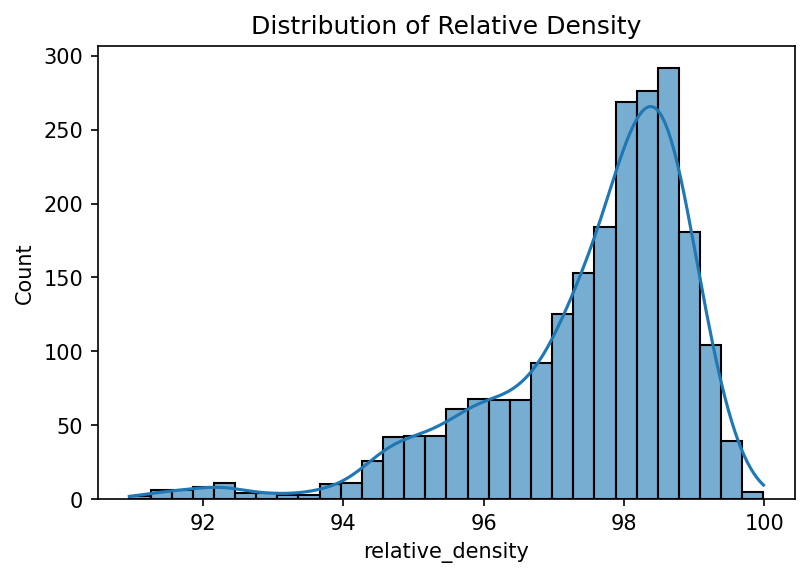

count    2205.000000
mean       97.529696
std         1.471280
min        90.950000
25%        96.870000
50%        97.960000
75%        98.550000
max        99.990000
Name: relative_density, dtype: float64

In [14]:
# EDA of relative_density
plt.figure(figsize=(6,4))
sns.histplot(df_raw["relative_density"], bins=30, kde=True, alpha=0.6)
plt.title("Distribution of Relative Density")
plt.show()

df_raw["relative_density"].describe()

Looking at the histogram, relative density is clearly left-skewed. Most parts sit very close to 100%, which is what we’d consider “good” (i.e., well-fused with minimal porosity). As density drops, we start to move into “worse” outcomes where porosity or lack-of-fusion defects are more likely.

The average density is about 97.5%, but interestingly, around half of the parts fall below this value, which shows there’s real variation in the process as not everything prints at the same quality level. This variation is exactly what we want to understand. The whole goal of the analysis is to figure out which features or conditions push density up or down, so we can identify what’s driving the lower-density parts and potentially improve the process.

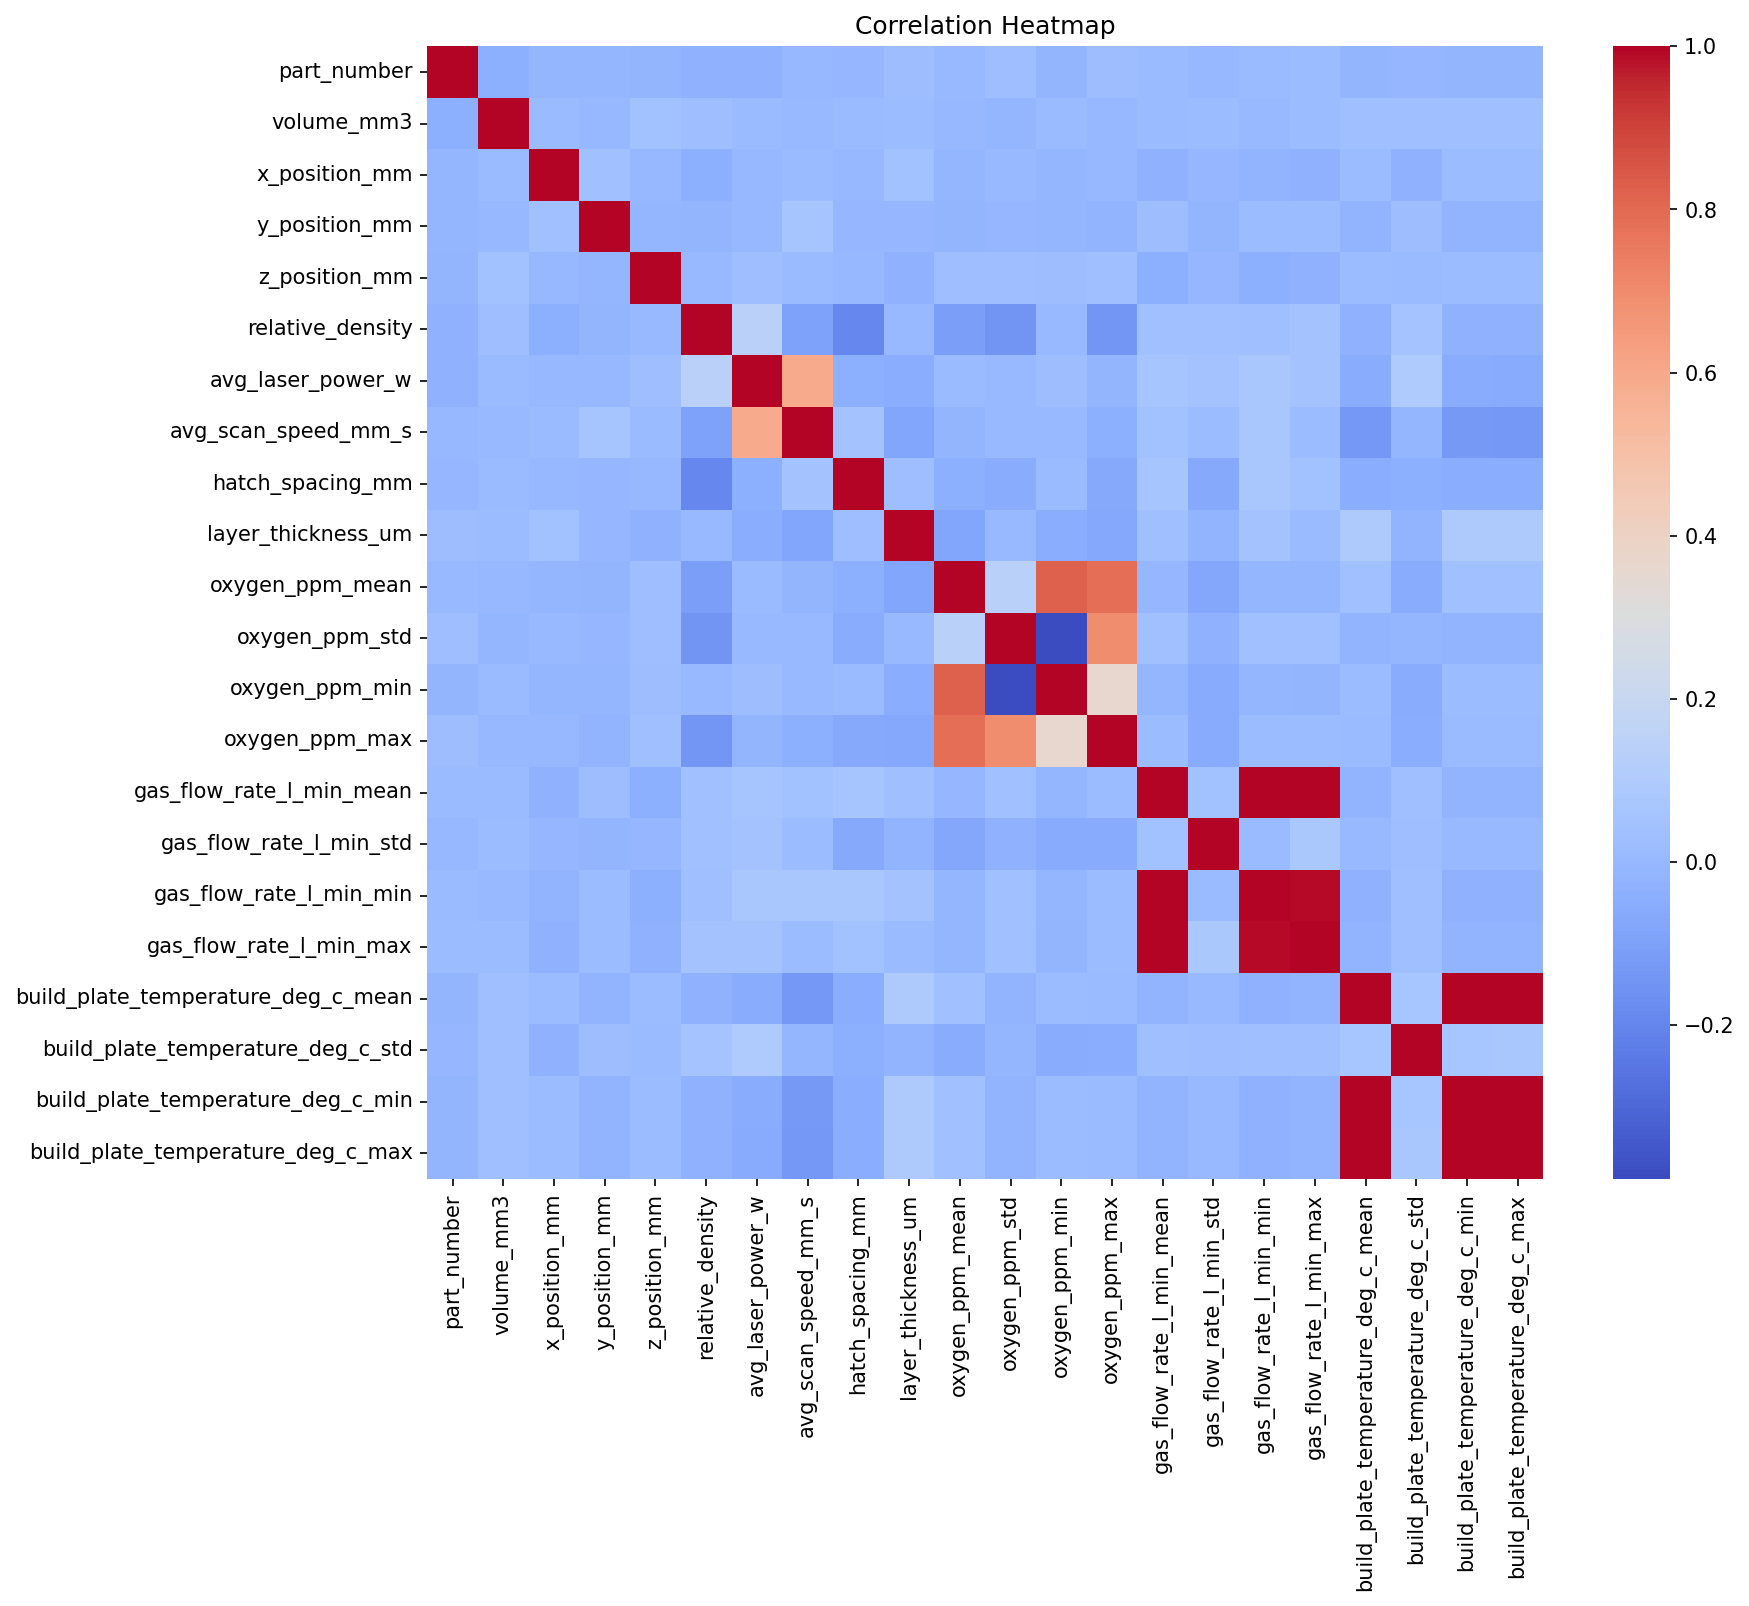

In [15]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_raw.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows that relative density doesn’t have any strong linear correlation with the other numerical features, which suggests there’s no single “simple” variable driving density on its own. We see small clusters of correlation (like between laser power and scan speed, or between the oxygen statistics), but nothing that explains the density variation directly. This tells us the problem is more nonlinear and multi-factor, so this will inform our modeling approach later on.

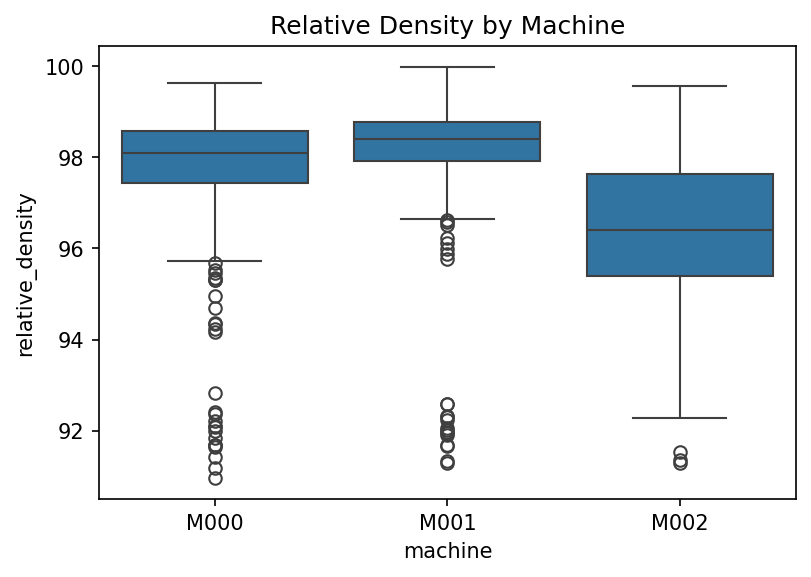

In [16]:
# Boxplot of relative_density by machine
plt.figure(figsize=(6,4))
sns.boxplot(x=df_raw["machine"], y=df_raw["relative_density"])
plt.title("Relative Density by Machine")
plt.show()

The box plot show above that machine with 'machine_id' equal to M002 tends to produce parts with lower relative density compared to the other machines. Not only is the mean relative density lower for M002, but it also has the highest standard deviation, indicating greater variability in part quality from this machine. This suggests that there may be specific issues or conditions associated with M002 that are negatively impacting part density, making it a key area for further investigation and potential process improvement.

In [17]:
# Summary statistics of relative_density by machine
df_raw.groupby("machine")["relative_density"].describe()

count       mean       std    min      25%  \
machine                                               
M000     753.0  97.876016  1.195182  90.95  97.4400   
M001     736.0  98.214796  1.096283  91.29  97.9175   
M002     716.0  96.461243  1.477206  91.29  95.4000   

            50%      75%    max  
machine                          
M000     98.100  98.5800  99.63  
M001     98.400  98.7800  99.99  
M002     96.405  97.6425  99.57

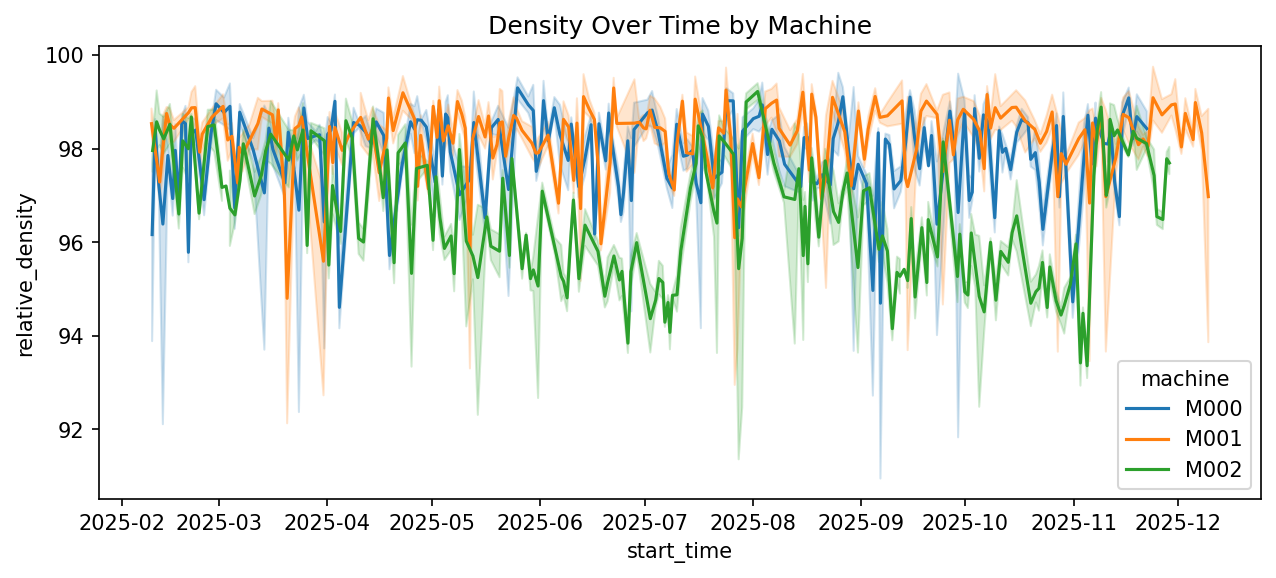

In [18]:
# Density Over Time by Machine
plt.figure(figsize=(10,4))
sns.lineplot(data=df_raw, x="start_time", y="relative_density", hue="machine")
plt.title("Density Over Time by Machine")
plt.show()

The above time series plot shows the relative density of parts produced over time by each machine. We can observe that there are fluctuations in relative density for all machines throughout the time period. However, machine M002 consistently produces parts with lower relative density compared to the other machines, which aligns with our earlier observation from the box plot. This repeated pattern for M002 lines up with earlier findings and suggests it’s the least stable machine of the three. Overall, this plot reinforces the idea that machine-specific effects, like calibration issues, are a real contributor to density variation.

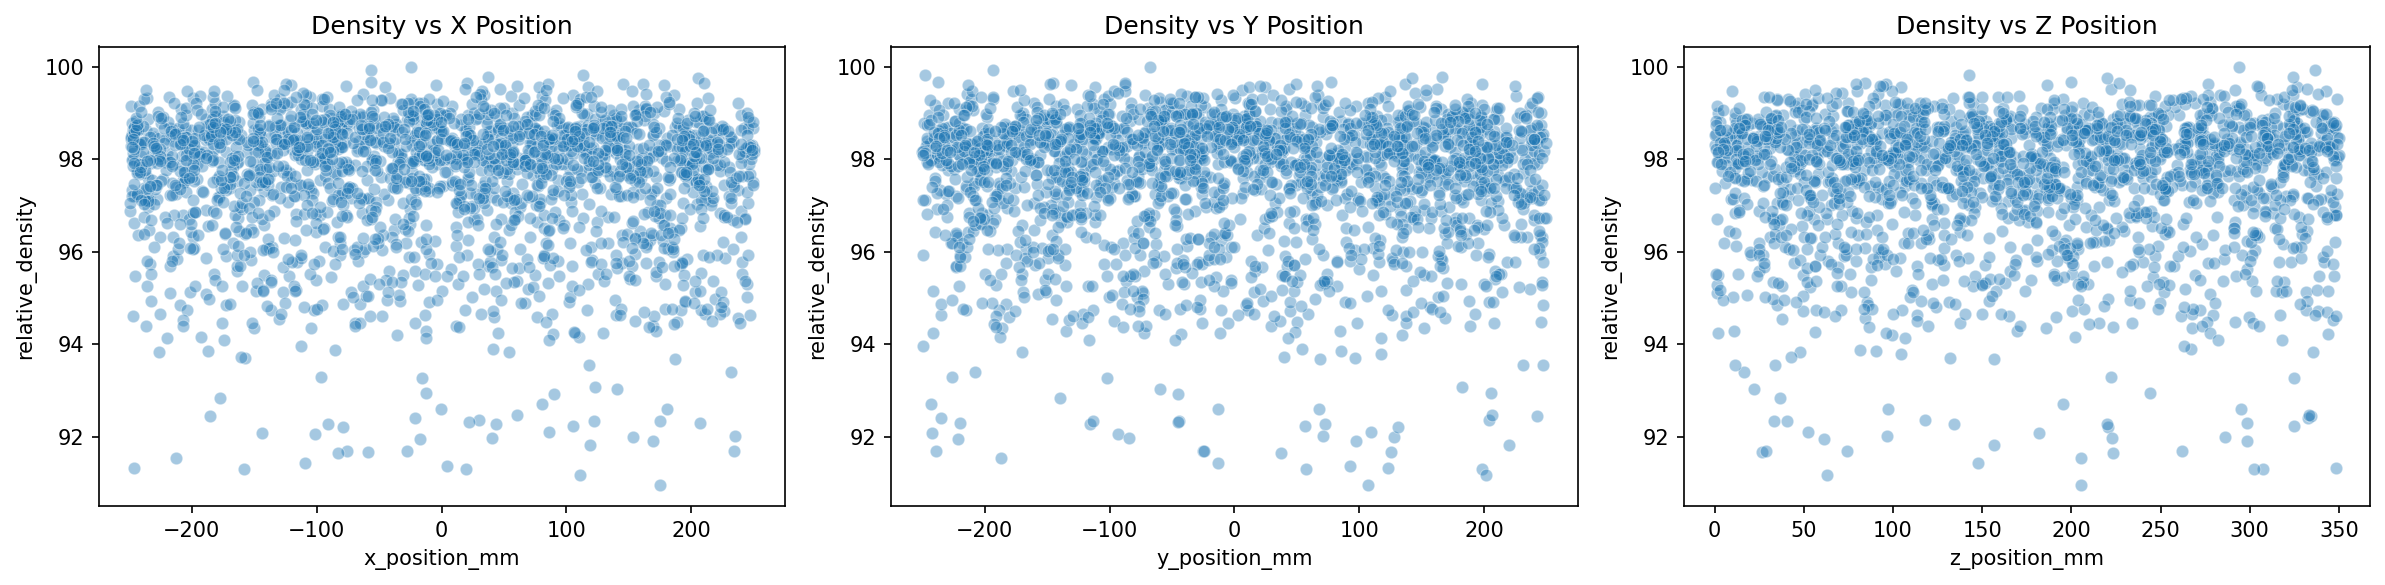

In [19]:
# Scatter plots of relative_density vs position
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.scatterplot(x=df_raw["x_position_mm"], y=df_raw["relative_density"], ax=ax[0], alpha=0.4)
ax[0].set_title("Density vs X Position")

sns.scatterplot(x=df_raw["y_position_mm"], y=df_raw["relative_density"], ax=ax[1], alpha=0.4)
ax[1].set_title("Density vs Y Position")

sns.scatterplot(x=df_raw["z_position_mm"], y=df_raw["relative_density"], ax=ax[2], alpha=0.4)
ax[2].set_title("Density vs Z Position")

plt.tight_layout()
plt.show()

These plots show density against part position in X, Y, and Z. There’s no strong pattern in X or Y; density is pretty evenly spread across the build plate. Along Z, there’s a bit more variation, especially in the lower density points, but nothing that forms a clear trend. Overall, part position doesn’t seem to be a major driver of density in this dataset, which suggests the variation we’re seeing comes more from the machine and process conditions than from where the part sits in the build volume.

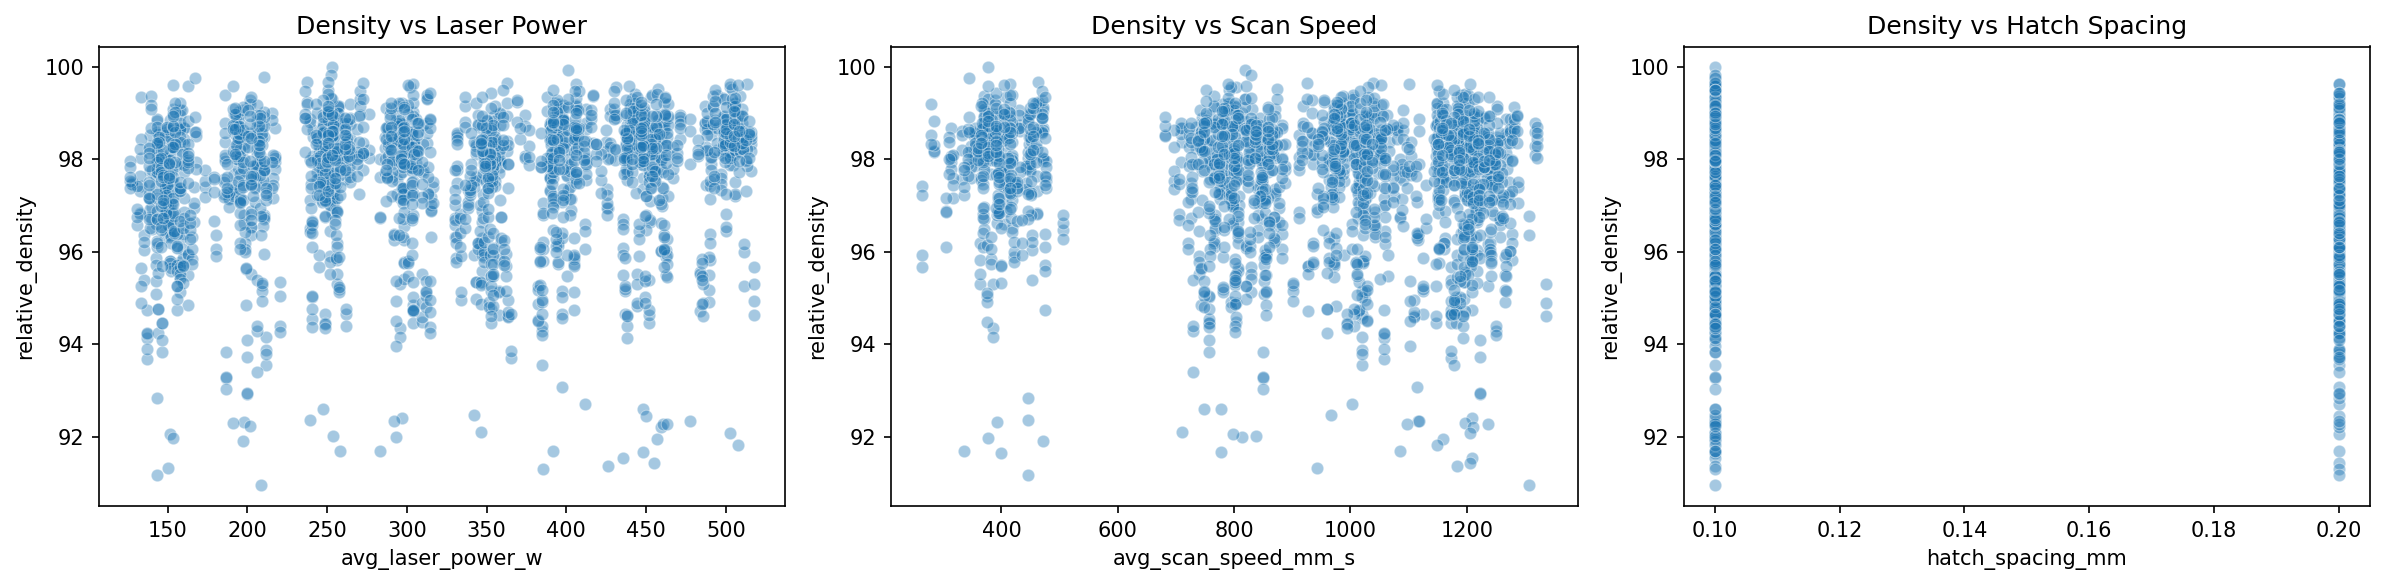

In [20]:
# Scatter plots of relative_density vs key process parameters
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.scatterplot(x=df_raw["avg_laser_power_w"], y=df_raw["relative_density"], ax=ax[0], alpha=0.4)
ax[0].set_title("Density vs Laser Power")

sns.scatterplot(x=df_raw["avg_scan_speed_mm_s"], y=df_raw["relative_density"], ax=ax[1], alpha=0.4)
ax[1].set_title("Density vs Scan Speed")

sns.scatterplot(x=df_raw["hatch_spacing_mm"], y=df_raw["relative_density"], ax=ax[2], alpha=0.4)
ax[2].set_title("Density vs Hatch Spacing")

plt.tight_layout()
plt.show()

These plots show how density varies with the main laser parameters. There isn’t a clear linear trend with laser power or scan speed, although you can see clusters where different parameter sets were used. Density stays mostly high across settings, but the lower-density points appear scattered throughout the full range, meaning these parameters alone don’t explain the variation. Hatch spacing doesn’t tell us much here either because it only takes two values in the dataset, so any effect is hard to separate by eye.

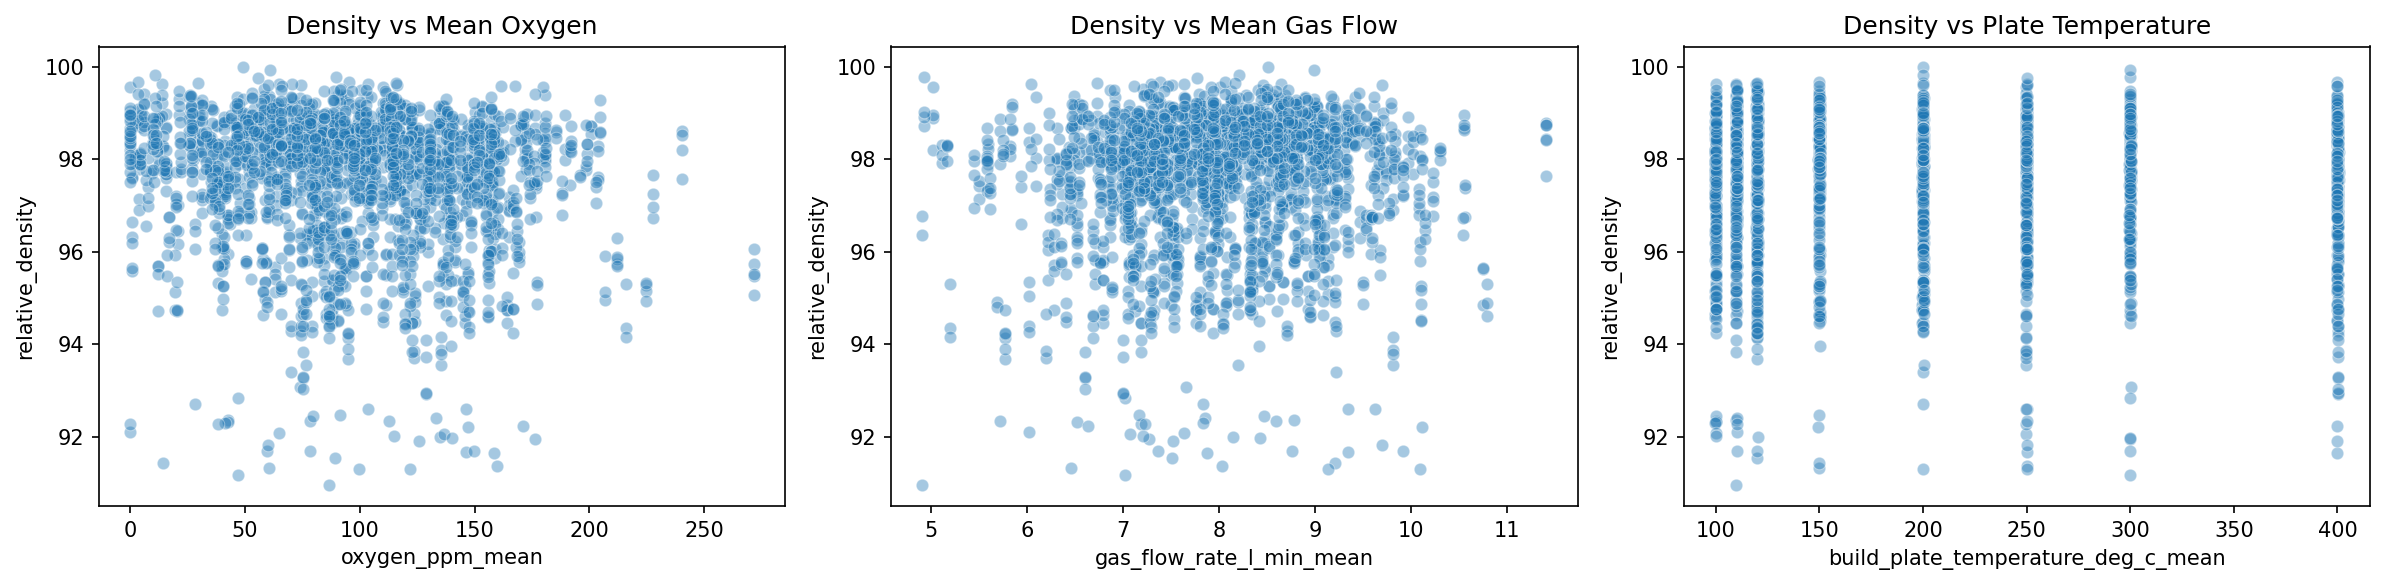

In [21]:
# Scatter plots of relative_density vs environmental parameters
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.scatterplot(x=df_raw["oxygen_ppm_mean"], y=df_raw["relative_density"], ax=ax[0], alpha=0.4)
ax[0].set_title("Density vs Mean Oxygen")

sns.scatterplot(x=df_raw["gas_flow_rate_l_min_mean"], y=df_raw["relative_density"], ax=ax[1], alpha=0.4)
ax[1].set_title("Density vs Mean Gas Flow")

sns.scatterplot(x=df_raw["build_plate_temperature_deg_c_mean"], y=df_raw["relative_density"], ax=ax[2], alpha=0.4)
ax[2].set_title("Density vs Plate Temperature")

plt.tight_layout()
plt.show()

These plots look at how density relates to the main environmental conditions during the build. There’s a bit more spread at higher oxygen levels, and some of the low-density points show up when oxygen or gas flow fluctuates, but the overall shape is still pretty scattered. Plate temperature also doesn’t show a clean trend; each machine mostly runs at a few fixed temperature setpoints, and density stays fairly similar across them. So while these factors likely play a role, none of them alone can explain the density variation we’re seeing.

In [22]:
# Summary statistics of relative_density by powder_batch
batch_summary = (
    df_raw.groupby("powder_batch")["relative_density"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)

display(batch_summary.head(), batch_summary.tail())
print("Number of unique powder batches:", df_raw["powder_batch"].nunique())

mean       std  count
powder_batch                                
POW_AlSi10Mg_041  94.788333  0.477509     30
POW_AlSi10Mg_073  94.953333  0.578160     27
POW_AlSi10Mg_076  94.962000  1.459655     25
POW_AlSi10Mg_038  95.063200  0.843943     25
POW_AlSi10Mg_068  95.242400  1.161519     25

mean       std  count
powder_batch                                
POW_AlSi10Mg_003  98.596000  0.478966     25
POW_AlSi10Mg_071  98.611154  0.478024     26
POW_AlSi10Mg_083  98.626500  0.468090     20
POW_AlSi10Mg_030  98.651667  0.695486     24
POW_AlSi10Mg_081  98.740800  0.521911     25

Number of unique powder batches: 86


Looking at the powder batches, there’s a clear split where some batches consistently produce lower densities while others sit up near 99%. This suggests powder quality or powder history might be playing a role, but it’s hard to draw strong conclusions because many batches only appear a few times in the dataset. With more time, I’d dig deeper into batch-level effects like for example checking whether certain batches were mostly run on the weaker-performing machine or checking powder age if that data is available.

## Step 3: Feature Engineering

In [23]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_imputed = df_raw.copy()  

le_machine = LabelEncoder()
le_powder_batch = LabelEncoder()

df_imputed["machine_encoded"] = le_machine.fit_transform(df_imputed["machine"])
df_imputed["powder_batch_encoded"] = le_powder_batch.fit_transform(df_imputed["powder_batch"])

I will start by label encoding the categorical variables 'machine' and 'powder_batch' to convert them into numerical format suitable for modeling. I choose label encoding because these categorical variables have a relatively high number of unique values, and one-hot encoding would create too many additional columns, leading increased dimensionality and potential overfitting.

In [24]:
# Detect features with missing values
features_to_impute = [
    col for col in df_imputed.columns
    if df_imputed[col].isna().sum() > 0 
]

# See percentage of missing values before imputation for these features
missing_before = df_imputed[features_to_impute].isna().mean() * 100
print("Percentage of missing values before imputation:")
display(missing_before.to_frame("percent_missing"))

Percentage of missing values before imputation:


percent_missing
volume_mm3                  7.074830
x_position_mm               5.351474
y_position_mm               5.306122
z_position_mm              10.566893
avg_laser_power_w           4.263039
avg_scan_speed_mm_s         9.795918
hatch_spacing_mm            4.580499

Given the presence of missing values in several features, I will create missing indicator variables for each feature that has missing values. This will help the model to potentially learn patterns associated with instances of missing data. As for imputation, I will use median imputation for numerical features with missing values, as it is robust to outliers and will help maintain the distribution of the data.

In [25]:
# Create missing indicators
for col in features_to_impute:
    df_imputed[col + "_missing"] = df_imputed[col].isna().astype(int)
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Calculate VED
df_imputed["layer_thickness_mm"] = df_imputed["layer_thickness_um"] / 1000.0

df_imputed["VED"] = (
    df_imputed["avg_laser_power_w"] / 
    (df_imputed["avg_scan_speed_mm_s"] * df_imputed["hatch_spacing_mm"] * df_imputed["layer_thickness_mm"])
)

# Calculate build duration in seconds
df_imputed["build_duration"] = (df_imputed["end_time"] - df_imputed["start_time"]).dt.total_seconds()

Other feature engineering steps include calculating the Volumetric Energy Density (VED) using the formula:
$$VED = \frac{Laser\ Power\ (W)}{Scan\ Speed\ (mm/s) \times Hatch\ Spacing\ (mm) \times Layer\ Thickness\ (mm)}.$$
This feature captures the energy input per unit volume during the printing process, which is a critical factor influencing the quality and density of the printed parts.

Additionally, I will calculate the build duration in seconds by taking the difference between 'end_time' and 'start_time'. This feature may provide insights into how the length of the build process affects part density.

In [26]:
# Check for nan or missing values after imputation
if df_imputed.isna().sum().sum() == 0:
    print("No missing values remain after imputation.")
else:
    print("There are still missing values after imputation.")
    missing_report(df_imputed, "df after imputation")

No missing values remain after imputation.


Now I will create the data set that will be used for modeling by separating the target variable 'relative_density' from the feature set. The feature set will include all engineered features as well as the original features, excluding any identifiers or non-predictive columns. Reasons for excluding certain columns include:
- 'part_id' and 'build_id' are identifiers and do not carry predictive information.
- 'start_time' and 'end_time' are timestamps that have been used to derive the 'build_duration' feature, so they are no longer needed.
- 'powder_batch', 'machine_id' are categorical variables that have been label encoded into 'powder_batch_encoded' and 'machine_encoded'.
- 'layer_thickness_um' has been converted to 'layer_thickness_mm' for consistency in units used in VED calculation.
- 'geometry' is a categorical variable with many unique values that may not provide useful predictive information in its current form, NLP techniques would be needed to extract meaningful features from it.

Finally, I will check to ensure that there are no remaining missing values in the feature set after imputation and feature engineering. If any missing values remain, I will address them accordingly before proceeding to model training.

In [27]:
# Columns to drop for modeling
cols_to_drop = [
    "part_number",
    "build_id",
    "start_time",
    "end_time",
    "machine",
    "powder_batch",
    "layer_thickness_um",
    "geometry"
]

# Create final modeling dataset
df_model = df_imputed.drop(columns=cols_to_drop)

In [28]:
# Inspect final modeling dataset
print("Final modeling dataset shape:", df_model.shape)
display(df_model.head())

Final modeling dataset shape: (2205, 32)


volume_mm3  x_position_mm  y_position_mm  \
0   6021421.0         -76.03         -24.82   
1   3447488.0         171.87        -123.01   
2   2856402.0        -162.56         177.87   
3   2280795.0        -142.24         -69.81   
4   7023322.0         133.03         144.22   

   z_position_mm  relative_density  avg_laser_power_w  \
0         262.09             91.69             282.95   
1          10.89             97.62             282.95   
2          79.51             96.74             282.95   
3          23.98             98.00             282.95   
4         232.74             96.76             282.95   

   avg_scan_speed_mm_s  hatch_spacing_mm  oxygen_ppm_mean  \
0              1086.15               0.2        59.863014   
1              1086.15               0.2        59.863014   
2              1086.15               0.2        59.863014   
3              1086.15               0.2        59.863014   
4              1086.15               0.2        59.863014   

   oxygen_ppm_std  oxygen_ppm_min  oxygen_ppm_max  \
0        5.140566            42.0            71.0   
1        5.140566            42.0            71.0   
2        5.140566            42.0            71.0   
3        5.140566            42.0            71.0   
4        5.140566            42.0            71.0   

   gas_flow_rate_l_min_mean  gas_flow_rate_l_min_std  \
0                  7.367143                 0.187121   
1                  7.367143                 0.187121   
2                  7.367143                 0.187121   
3                  7.367143                 0.187121   
4                  7.367143                 0.187121   

   gas_flow_rate_l_min_min  gas_flow_rate_l_min_max  \
0                     6.99                     7.82   
1                     6.99                     7.82   
2                     6.99                     7.82   
3                     6.99                     7.82   
4                     6.99                     7.82   

   build_plate_temperature_deg_c_mean  \
0                          110.149333   
1                          110.149333   
2                          110.149333   
3                          110.149333   
4                          110.149333   

   build_plate_temperature_deg_c_std  \
0                           1.443941   
1                           1.443941   
2                           1.443941   
3                           1.443941   
4                           1.443941   

   build_plate_temperature_deg_c_min  \
0                              107.5   
1                              107.5   
2                              107.5   
3                              107.5   
4                              107.5   

   build_plate_temperature_deg_c_max  machine_encoded  \
0                              113.9                0   
1                              113.9                0   
2                              113.9                0   
3                              113.9                0   
4                              113.9                0   

   powder_batch_encoded  volume_mm3_missing  \
0                     0                   0   
1                     0                   0   
2                     0                   0   
3                     0                   0   
4                     0                   0   

   x_position_mm_missing  y_position_mm_missing  \
0                      0                      0   
1                      0                      0   
2                      0                      0   
3                      0                      0   
4                      0                      0   

   z_position_mm_missing  avg_laser_power_w_missing  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      0                          0   

   avg_scan_speed_mm_s_missing

## Step 4: Creating the Models

In [29]:
# Separate features and target variable
target = "relative_density"

X = df_model.drop(columns=[target])
y = df_model[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((1764, 31), (441, 31))

I chose XGBoost because it handles nonlinear relationships and feature interactions really well, which matters here since density is influenced by several factors working together. It performs strongly out of the box, works well with different types of features, and integrates nicely with SHAP for interpretability. SHAP (SHapley Additive exPlanations) helps explain how each feature pushes a prediction up or down, both in direction and magnitude. This is especially useful for a multi-factor, nonlinear problem like this one, where traditional correlations don’t fully capture the underlying relationships.

In [30]:
# Baseline XGBoost with 5-fold CV
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb_base = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    tree_method="hist"
)

xgb_cv_scores = cross_val_score(
    xgb_base,
    X_train, y_train,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

print("XGBoost (baseline) CV (5-fold) MAE:",
      f"{-xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")

XGBoost (baseline) CV (5-fold) MAE: 0.5906 ± 0.0130


I used 5-fold cross-validation to get a more reliable estimate of the model’s performance, especially given the relatively small dataset. It helps reduce the risk of the results depending too much on a single train-test split. Using five folds is a good balance between stability and computational cost, and gives an idea on how tuning hyperparameters might improve things further. 

XGBoost (baseline) CV (5-fold) Mean Absolute Error (MAE): 0.5906 ± 0.0130. This means the model’s average error across the five folds is about 0.59 density points, with very little variation between folds. The small standard deviation shows the model is stable and performs consistently across different splits of the data, which gives confidence in the baseline performance before tuning.

For reference the mean absolute error of a naive model that always predicts the mean relative density (97.5%) is about 1.45. So our XGBoost baseline is already cutting the error by more than half compared to this simple approach, which shows it’s capturing meaningful patterns in the data.

The mean absolute error is calculated as the average of the absolute differences between the predicted and actual values. 

In [31]:
# Lightweight hyperparameter tuning for XGBoost
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.03],
    "n_estimators": [300, 600],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

xgb = XGBRegressor(
    random_state=42,
    tree_method="hist"
)

# Define GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best XGB params:", grid.best_params_)
print("Best XGB CV MAE:", -grid.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best XGB params: {'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}
Best XGB CV MAE: 0.5887647408206446


The hyperparameter search tested 48 different XGBoost configurations using 3-fold cross-validation, and the best setup achieved a CV MAE of 0.5888, which is a small but meaningful improvement over the baseline. This search helps find a better balance between model complexity, learning rate, and tree depth, so the model can capture nonlinear patterns without overfitting. I limited the grid search due to time constraints, but it still gave a good sense of which parameter ranges work best for this problem. 

Also, please note that for larger grid searches and training times, I would save the optimized model to disk using joblib or pickle for future use without retraining.

In [32]:
# Evaluate best XGBoost model on test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_xgb = grid.best_estimator_
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)

# Calculate test metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("Best XGBoost Test Performance:")
print(f" MAE : {xgb_mae:.4f}")
print(f" Relative to mean density MAE: {(xgb_mae / y_train.mean() * 100):.2f}%")
print(f" RMSE: {xgb_rmse:.4f}")
print(f" R2 : {xgb_r2:.4f}")

Best XGBoost Test Performance:
 MAE : 0.5250
 Relative to mean density MAE: 0.54%
 RMSE: 0.8905
 R2 : 0.5904


Now that the model has been trained using the optimized hyperparameters, we can evaluate its performance on the test set. The XGBoost model achieves a MAE of 0.5250, which corresponds to only 0.54% relative error compared to the average density – meaning the model is usually within about half a density point of the true value.

The Root Mean Square Error (RMSE) of 0.8905 measures the square root of the average squared prediction error, which means larger mistakes are penalized more heavily.

The R2 score of 0.5904 indicates that the model explains around 59% of the variance in density. R2 ranges from 1.0 (perfect prediction) down to 0 (no better than predicting the mean), and it can even become negative if the model performs worse than a simple baseline. An R2 around 0.59 shows that the model is capturing meaningful patterns without overfitting, since the performance is solid but not unrealistically high for this type of noisy, multi-factor data.

Now we create and evaluate a Linear Regression model as a baseline linear model for comparison with XGBoost. Linear Regression is a good choice here because it provides a simple, interpretable model without regularization, serving as a baseline to assess the added value of more complex models like XGBoost.

As a result we must drop encoded categorical features before training the Linear Regression model, since linear models like Linear Regression cannot directly handle categorical variables. Including them would lead to incorrect interpretations and potentially poor performance. We also drop 'VED' since it is derived from other features already included in the model, and including it could introduce redundancy and multicollinearity.

In [33]:
df_lr = df_model.copy()

# Drop columns not suitable for linear models
cols_to_drop = [
    'machine_encoded',
    'powder_batch_encoded',
    'VED',
    'volume_mm3_missing', 
    'x_position_mm_missing',
    'y_position_mm_missing', 
    'z_position_mm_missing',
    'avg_laser_power_w_missing',
    'avg_scan_speed_mm_s_missing',
    'hatch_spacing_mm_missing',
] + [col for col in df_lr.columns if col.endswith('_missing')]

df_lr = df_lr.drop(columns=cols_to_drop, errors='ignore')

print("Final Linear Regression modeling dataset shape:", df_lr.shape)
display(df_lr.head())

Final Linear Regression modeling dataset shape: (2205, 22)


volume_mm3  x_position_mm  y_position_mm  \
0   6021421.0         -76.03         -24.82   
1   3447488.0         171.87        -123.01   
2   2856402.0        -162.56         177.87   
3   2280795.0        -142.24         -69.81   
4   7023322.0         133.03         144.22   

   z_position_mm  relative_density  avg_laser_power_w  \
0         262.09             91.69             282.95   
1          10.89             97.62             282.95   
2          79.51             96.74             282.95   
3          23.98             98.00             282.95   
4         232.74             96.76             282.95   

   avg_scan_speed_mm_s  hatch_spacing_mm  oxygen_ppm_mean  \
0              1086.15               0.2        59.863014   
1              1086.15               0.2        59.863014   
2              1086.15               0.2        59.863014   
3              1086.15               0.2        59.863014   
4              1086.15               0.2        59.863014   

   oxygen_ppm_std  oxygen_ppm_min  oxygen_ppm_max  \
0        5.140566            42.0            71.0   
1        5.140566            42.0            71.0   
2        5.140566            42.0            71.0   
3        5.140566            42.0            71.0   
4        5.140566            42.0            71.0   

   gas_flow_rate_l_min_mean  gas_flow_rate_l_min_std  \
0                  7.367143                 0.187121   
1                  7.367143                 0.187121   
2                  7.367143                 0.187121   
3                  7.367143                 0.187121   
4                  7.367143                 0.187121   

   gas_flow_rate_l_min_min  gas_flow_rate_l_min_max  \
0                     6.99                     7.82   
1                     6.99                     7.82   
2                     6.99                     7.82   
3                     6.99                     7.82   
4                     6.99                     7.82   

   build_plate_temperature_deg_c_mean  \
0                          110.149333   
1                          110.149333   
2                          110.149333   
3                          110.149333   
4                          110.149333   

   build_plate_temperature_deg_c_std  \
0                           1.443941   
1                           1.443941   
2                           1.443941   
3                           1.443941   
4                           1.443941   

   build_plate_temperature_deg_c_min  \
0                              107.5   
1                              107.5   
2                              107.5   
3                              107.5   
4                              107.5   

   build_plate_temperature_deg_c_max  layer_thickness_mm  \
0                              113.9                0.04   
1                              113.9                0.04   
2                              113.9                0.04   
3                              113.9                0.04   
4                              113.9                0.04   

   build_duration  
0    70143.357897  
1    70143.357897  
2    70143.357897  
3    70143.357897  
4    70143.357897

In [34]:
# Separate features and target for Ridge Regression
X_lr = df_lr.drop(columns=[target])
y_lr = df_lr['relative_density']

# Train/test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42
)

# Standardize features for Ridge Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lr)
X_test_scaled = scaler.transform(X_test_lr)

For linear regression, we also need to standardize the features to have zero mean and unit variance. This is important because Linear Regression penalizes large coefficients, and if features are on different scales, it can lead to suboptimal performance. Standardizing ensures that all features contribute equally to the regularization term.

In [35]:
# Linear Regression baseline
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_lr)

# Use Cross-Validation to evaluate Linear Regression
lr_cv_scores = cross_val_score(
    linear_model,
    X_train_scaled, y_train_lr,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

print("Linear Regression CV (5-fold) MAE:",
      f"{-lr_cv_scores.mean():.4f} ± {lr_cv_scores.std():.4f}")

y_pred_linear = linear_model.predict(X_test_scaled)

print("Linear Regression Performance:")
print(" MAE :", mean_absolute_error(y_test_lr, y_pred_linear))
print(" Relative to mean density MAE:", (mean_absolute_error(y_test_lr, y_pred_linear) / y_train_lr.mean() * 100))
print(" RMSE:", np.sqrt(mean_squared_error(y_test_lr, y_pred_linear)))
print(" R2  :", r2_score(y_test_lr, y_pred_linear))

Linear Regression CV (5-fold) MAE: 1.0234 ± 0.0269
Linear Regression Performance:
 MAE : 0.9721970131333062
 Relative to mean density MAE: 0.9969615029564903
 RMSE: 1.2895966071509632
 R2  : 0.1409137900804538


Linear Regression doesn’t perform very well on this dataset. The 5-fold CV MAE is over 1.02, and the test MAE stays close to 0.97, which is almost 1% density error relative to the mean. The RMSE is also higher, and the R2 of about 0.14 shows the model only explains a small portion of the variance in density. This makes sense because Linear Regression can only capture simple linear trends, while the density in this dataset depends on nonlinear interactions between several features. In contrast, XGBoost handles those nonlinear relationships much better and consistently achieves lower errors and a much stronger R2, making it clearly the better model for this problem.

## Step 5: Evaluating the models, interpreting results and proposing modifications

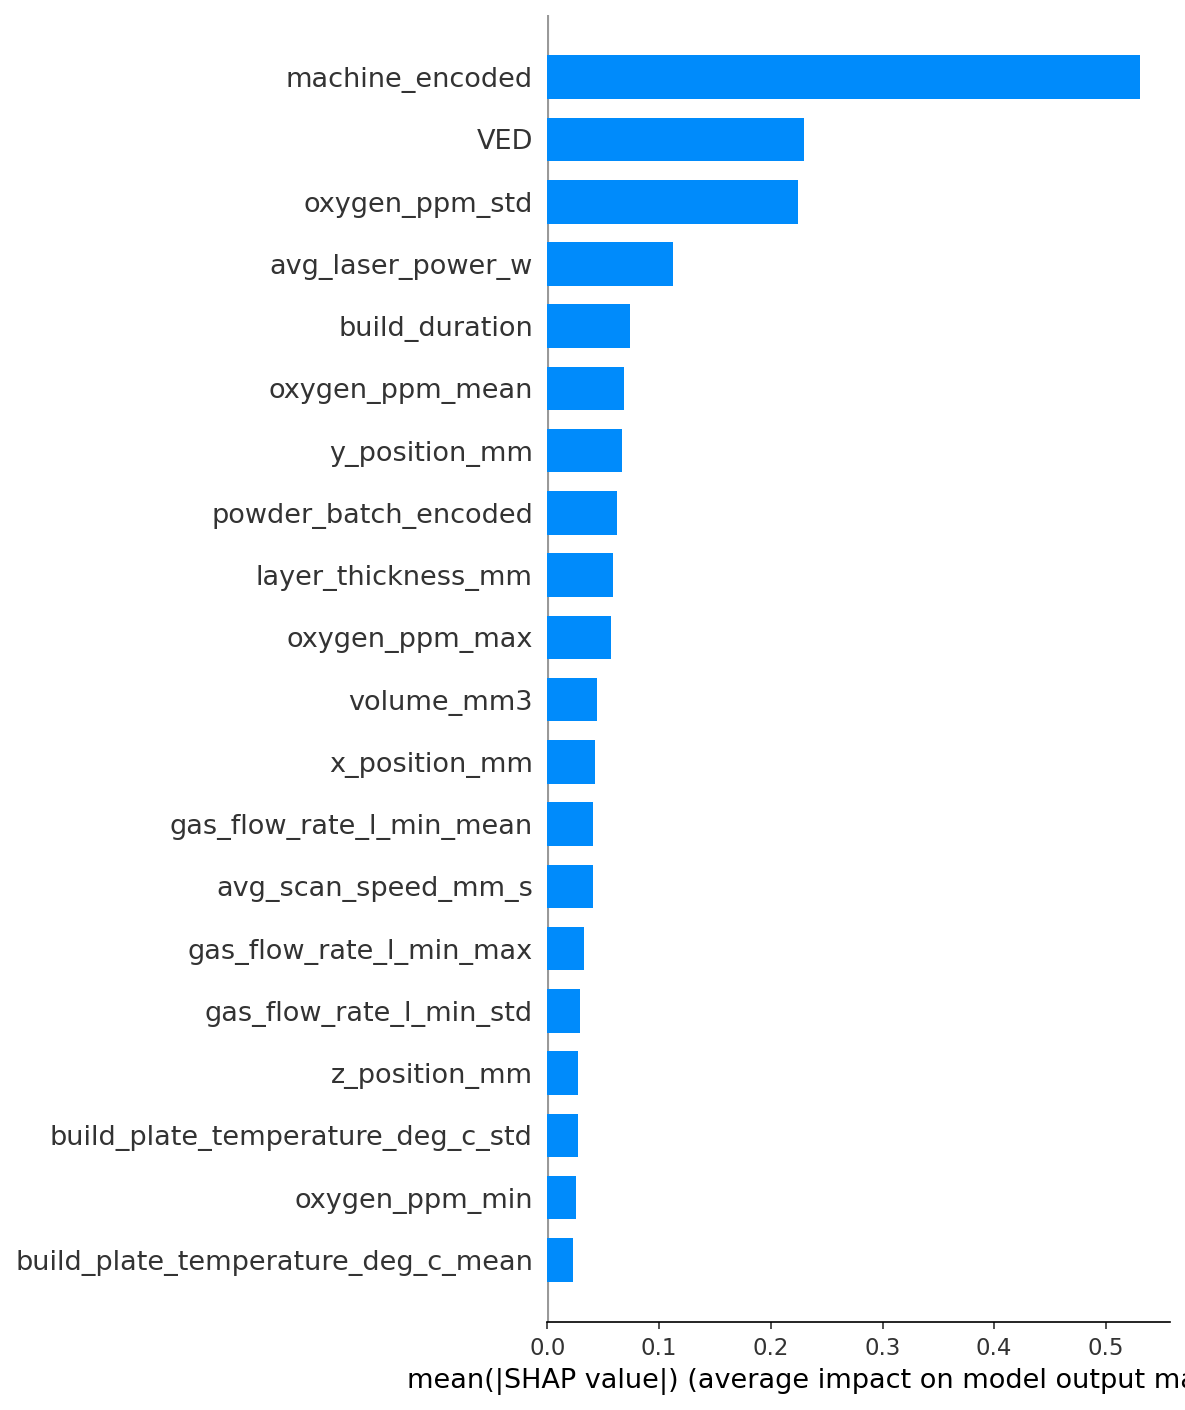

In [36]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

SHAP (SHapley Additive exPlanations) helps us understand how each feature contributes to the model’s predictions by measuring how much each variable pushes the predicted density up or down. Part of the reason I chose XGBoost is its ability to provide these insights. In this summary plot, machine ID is by far the most influential feature, followed by VED and oxygen stability, while the remaining features have much smaller effects. This strongly supports our earlier observation that Machine M002 consistently produces lower-density parts, and the model independently confirms that the machine itself is the dominant driver of density variation. Based on this, it would be sensible to investigate what is happening with M002—whether it’s calibration drift, hardware degradation, or environmental differences—because fixing that issue is likely to have the biggest impact on improving overall part quality.

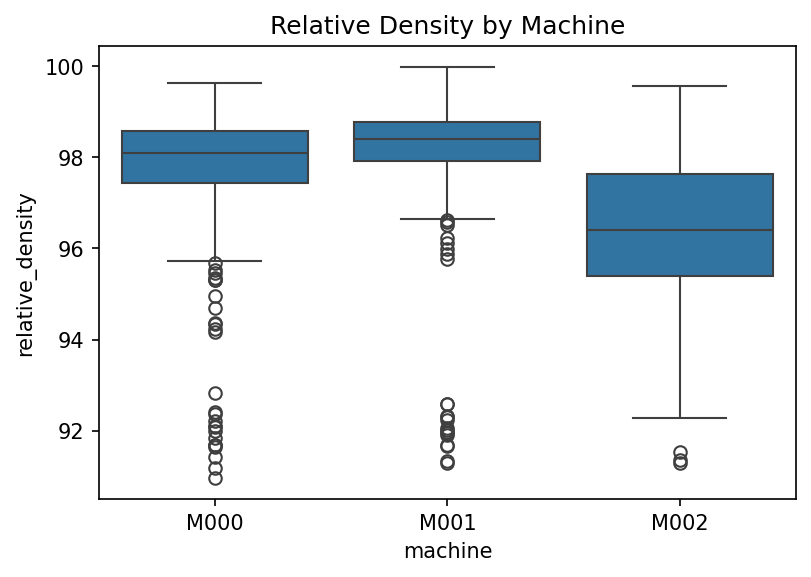

In [37]:
# Boxplot of relative_density by machine reminder
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="machine", y="relative_density")
plt.title("Relative Density by Machine")
plt.show()

This is again the boxplot of relative_density by machine, and we can see that machine M002 has the lowest median relative density and the widest spread, indicating it produces lower quality parts compared to the other machines. This aligns with our earlier findings from the SHAP analysis, which highlighted machine ID as the most influential feature affecting density. The consistency of these observations across different analyses reinforces the conclusion that machine-specific factors are a key driver of part density variation in this dataset.

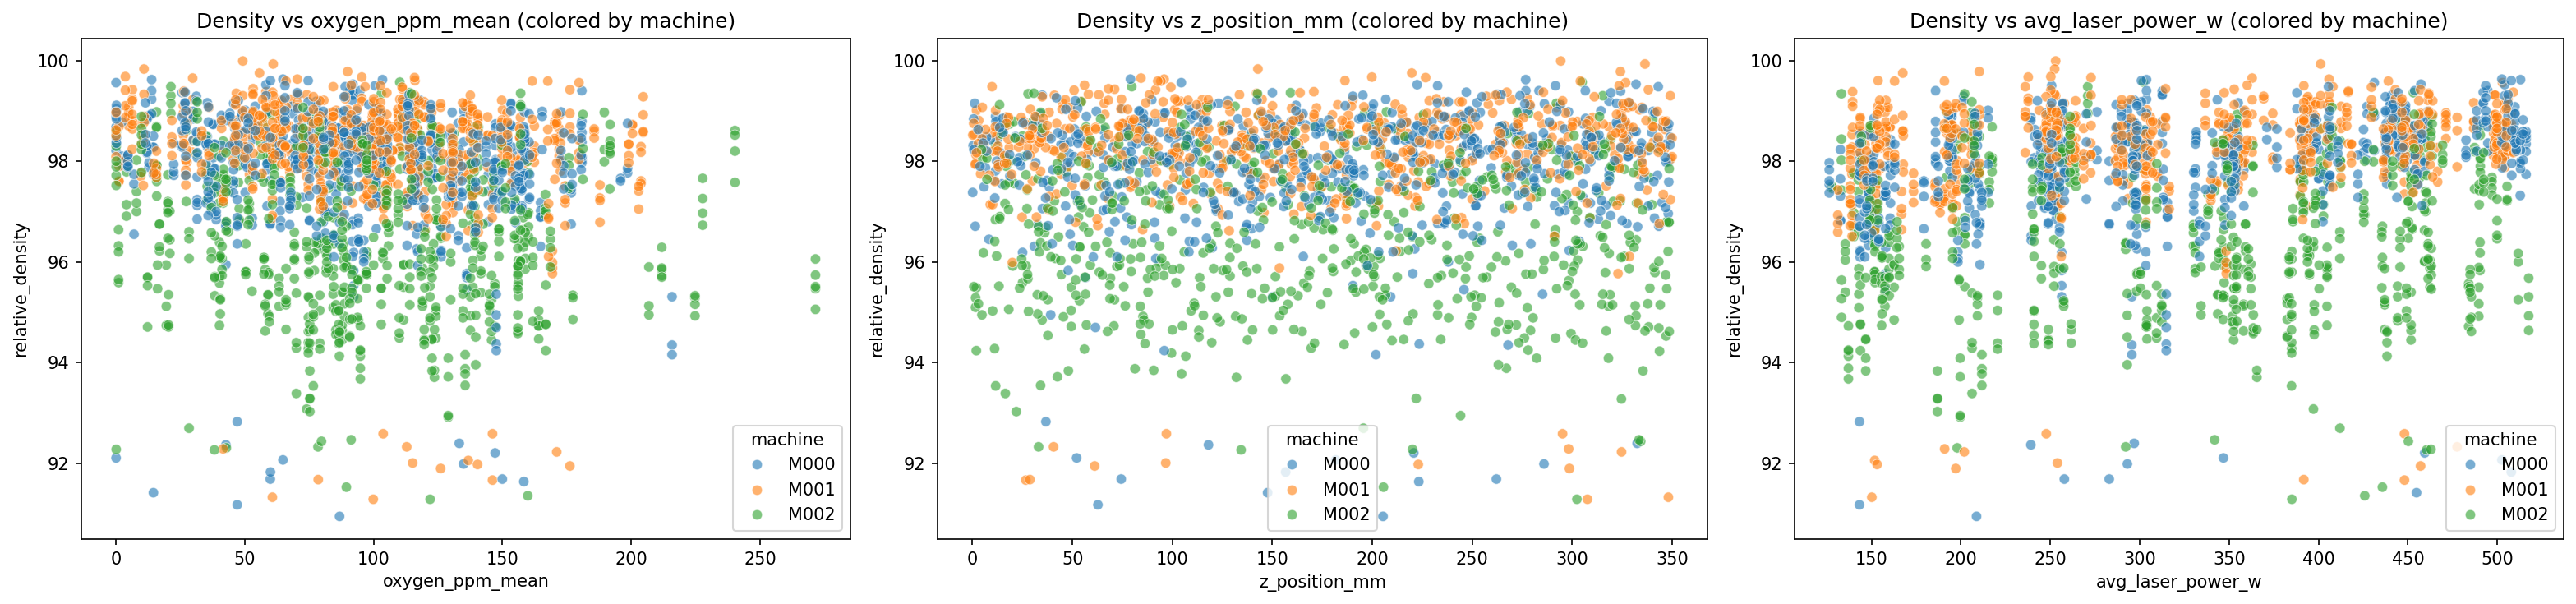

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(21,5))
features = ["oxygen_ppm_mean", "z_position_mm",
            "avg_laser_power_w"]

for i, feat in enumerate(features):
    sns.scatterplot(data=df, x=feat, y="relative_density", hue="machine",
                    alpha=0.6, palette="tab10", ax=axes[i])
    axes[i].set_title(f"Density vs {feat} (colored by machine)")

plt.tight_layout()
plt.show()

We plot the scatter plots of densities against different features but I coloured the points by machine ID this time. This helps visualize how each machine behaves across the feature space. We can see that M002 (in orange) consistently produces lower densities across all features, reinforcing the idea that machine-specific issues are at play. The other machines (M001 in blue and M003 in green) tend to cluster at higher densities, showing more stable performance. This visualization further supports the conclusion that addressing machine-specific factors, particularly for M002, could lead to significant improvements in part density and overall quality.

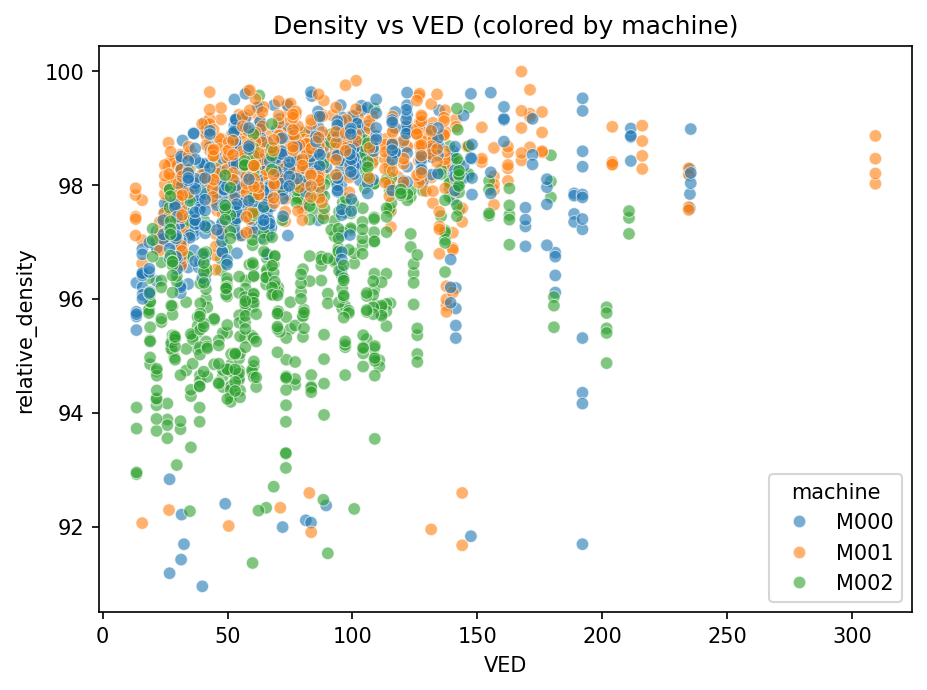

In [39]:
df['VED'] = (
    df["avg_laser_power_w"] / 
    (df["avg_scan_speed_mm_s"] * df["hatch_spacing_mm"] * (df["layer_thickness_um"] / 1000.0))
)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="VED",
    y="relative_density",
    hue="machine",
    alpha=0.6,
    palette="tab10"
)
plt.title("Density vs VED (colored by machine)")
plt.show()

Here we wee that M002 consistently produces lower-density parts across all ranges of VED, indicating that the machine itself is a key factor in the lower densities observed. The other machines (M001 and M003) tend to achieve higher densities, especially at optimal VED values, suggesting they are functioning better. This reinforces the conclusion that machine-specific issues with M002 are likely driving the density variation, and addressing those issues could lead to significant improvements in part quality.